<a href="https://colab.research.google.com/github/agarwalpratik/aiml/blob/main/Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [193]:
import pandas as pd
data = pd.read_csv("AusApparalSales4thQrt2020.csv")

In [194]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [195]:
#Inspect the data manually to identify missing or incorrect
#information using the functions isna() and notna().

In [196]:
data.isna().sum()

,0
Date,0
Time,0
State,0
Group,0
Unit,0
Sales,0


In [197]:
data.notna().sum()

,0
Date,7560
Time,7560
State,7560
Group,7560
Unit,7560
Sales,7560


In [198]:
pd.set_option('display.float_format','{:.2f}'.format)
data.describe()

,Unit,Sales
count,7560.00,7560.00
mean,18.01,45013.56
std,12.90,32253.51
min,2.00,5000.00
25%,8.00,20000.00
50%,14.00,35000.00
75%,26.00,65000.00
max,65.00,162500.00


In [199]:
#Based on your knowledge of data analytics, include your
#recommendations for treating missing and incorrect data (dropping the
#null values or filling them).

#No missing or null data present

In [200]:
#Choose a suitable data wrangling technique—either data standardization
#or normalization. Execute the preferred normalization method and
#present the resulting data.

In [201]:
#Goal: Identify the extreme values and remove the same
# To identify extreme value we need to identify the range
# To identify the range, we will use 1.5 IQR rule (Tukey's Method)
import numpy as np

def outlierDetection(column):
  #1. Sort the data in ascending order
  sorted(column)

  #2. Calc Q1 and Q3
  Q1,Q3 = np.percentile(column,[25,75])

  #3. Calc IQR
  IQR = Q3 - Q1

  #4. Calc Valid Range
  lowerRange = Q1 - (1.5 * IQR)
  upperRange = Q3 + (1.5 * IQR)

  return lowerRange,upperRange

In [202]:
import seaborn as sns

<ipython-input-203-4cc14510bd62>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Unit'])


<Axes: xlabel='Unit', ylabel='Density'>

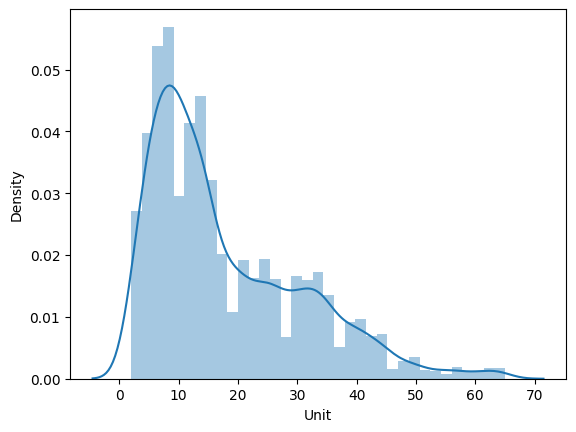

In [203]:
sns.distplot(data['Unit'])

In [204]:
lr_unit,ur_unit = outlierDetection(data['Unit'])
lr_unit,ur_unit

(-19.0, 53.0)

In [205]:
#Delete Outliers

processedData = data[(data['Unit'] >= lr_unit) & (data['Unit'] <= ur_unit)]

In [206]:
processedData.describe()

,Unit,Sales
count,7437.00,7437.00
mean,17.32,43292.66
std,11.83,29565.26
min,2.00,5000.00
25%,8.00,20000.00
50%,14.00,35000.00
75%,25.00,62500.00
max,53.00,132500.00


<ipython-input-207-305adbbc9c27>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(processedData['Unit'])


<Axes: xlabel='Unit', ylabel='Density'>

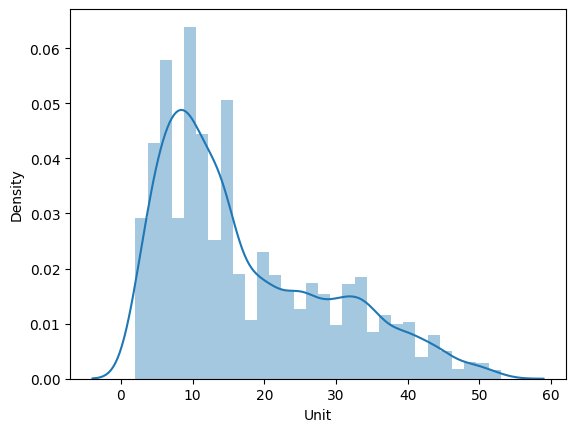

In [207]:
sns.distplot(processedData['Unit'])

<ipython-input-208-b4353a8201f0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(processedData['Sales'])


<Axes: xlabel='Sales', ylabel='Density'>

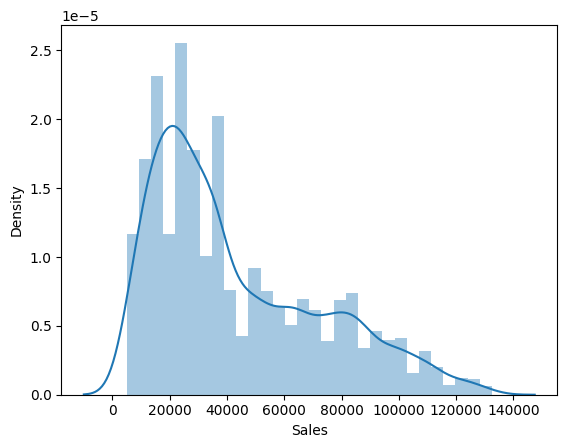

In [208]:
sns.distplot(processedData['Sales'])

In [209]:
lr_sales,ur_sales = outlierDetection(processedData['Sales'])
lr_sales,ur_sales

(-43750.0, 126250.0)

In [210]:
#Delete Outliers

processedDataFinal = processedData[(processedData['Sales'] >= lr_sales) & (processedData['Sales'] <= ur_sales)]

In [211]:
processedDataFinal.describe()

,Unit,Sales
count,7409.00,7409.00
mean,17.19,42964.98
std,11.65,29135.36
min,2.00,5000.00
25%,8.00,20000.00
50%,14.00,35000.00
75%,25.00,62500.00
max,50.00,125000.00


<ipython-input-212-19248724b783>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(processedDataFinal['Sales'])


<Axes: xlabel='Sales', ylabel='Density'>

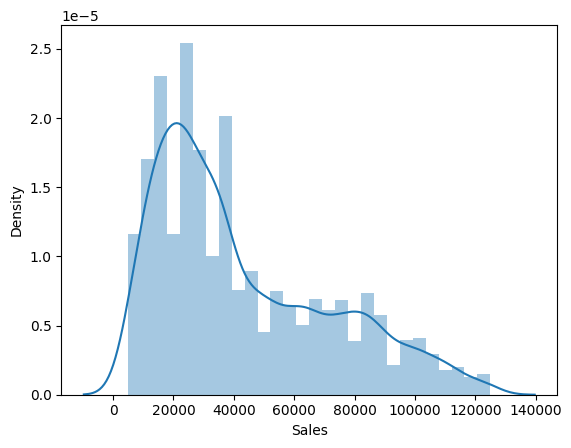

In [212]:
sns.distplot(processedDataFinal['Sales'])

<ipython-input-213-8088c28025ca>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(processedDataFinal['Unit'])


<Axes: xlabel='Unit', ylabel='Density'>

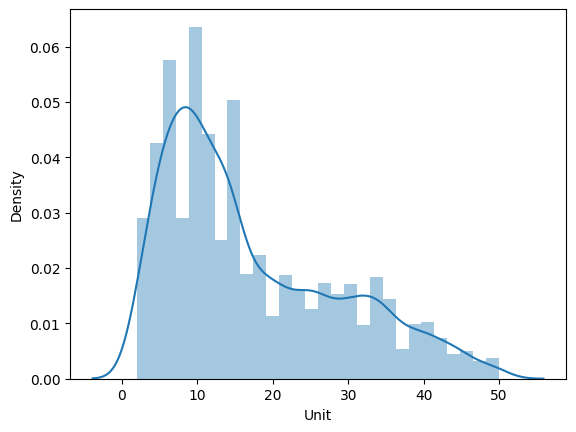

In [213]:
sns.distplot(processedDataFinal['Unit'])

In [214]:
#Share your insights regarding the application of the GroupBy() function for
#either data chunking or merging, and offer a recommendation based on
#your analysis.

#We can create a grouping of categories and apply a function to the categories.

processedDataFinal

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,30-Dec-2020,Afternoon,TAS,Seniors,14,35000
7556,30-Dec-2020,Evening,TAS,Kids,15,37500
7557,30-Dec-2020,Evening,TAS,Men,15,37500
7558,30-Dec-2020,Evening,TAS,Women,11,27500


In [215]:
processedDataFinal.groupby('Time').groups

{' Afternoon': [4, 5, 6, 7, 16, 17, 18, 19, 28, 29, 30, 31, 40, 41, 42, 43, 52, 53, 54, 55, 64, 65, 66, 67, 76, 77, 78, 79, 88, 89, 90, 91, 100, 101, 102, 103, 112, 113, 114, 115, 124, 125, 126, 127, 136, 137, 138, 139, 148, 149, 150, 151, 160, 161, 162, 163, 172, 173, 174, 175, 184, 185, 186, 187, 196, 197, 198, 199, 208, 209, 210, 211, 220, 221, 222, 223, 232, 233, 234, 235, 244, 245, 246, 247, 256, 257, 258, 259, 268, 269, 270, 271, 280, 281, 282, 283, 292, 293, 294, 295, ...], ' Evening': [8, 9, 10, 11, 20, 21, 22, 23, 32, 33, 34, 35, 44, 45, 46, 47, 56, 57, 58, 59, 68, 69, 70, 71, 80, 81, 82, 83, 92, 93, 94, 95, 104, 105, 106, 107, 116, 117, 118, 119, 128, 129, 130, 131, 140, 141, 142, 143, 152, 153, 154, 155, 164, 165, 166, 167, 176, 177, 178, 179, 188, 189, 190, 191, 200, 201, 202, 203, 212, 213, 214, 215, 224, 225, 226, 227, 236, 237, 238, 239, 248, 249, 250, 251, 260, 261, 262, 263, 272, 273, 274, 275, 284, 285, 286, 287, 296, 297, 298, 299, ...], ' Morning': [0, 1, 2, 3, 12, 

In [216]:
#Perform descriptive statistical analysis on the data in the Sales and Unit
#columns. Utilize techniques such as mean, median, mode, and standard
#deviation for this analysis.

processedDataFinal.describe()

,Unit,Sales
count,7409.00,7409.00
mean,17.19,42964.98
std,11.65,29135.36
min,2.00,5000.00
25%,8.00,20000.00
50%,14.00,35000.00
75%,25.00,62500.00
max,50.00,125000.00


In [217]:
processedDataFinal['Unit'].mean(),processedDataFinal['Unit'].median(),processedDataFinal['Unit'].mode()

(17.18599001214739,
 14.0,
 0    9
 Name: Unit, dtype: int64)

In [218]:
processedDataFinal['Sales'].mean(),processedDataFinal['Sales'].median(),processedDataFinal['Sales'].mode()

(42964.97503036847,
 35000.0,
 0    22500
 Name: Sales, dtype: int64)

In [219]:
#Identify the group with the highest sales and the group with the lowest
#sales based on the data provided.

processedDataFinal.groupby('Group').agg({'Sales': 'sum'})['Sales'].idxmax()

' Kids'

In [220]:
processedDataFinal.groupby('Group').agg({'Sales': 'sum'})['Sales'].idxmin()

' Seniors'

In [221]:
#Identify the group with the highest and lowest sales based on the data
#provided.

processedDataFinal.groupby('Group').agg({'Sales': 'sum'})['Sales']

,Sales
Group,
Kids,80200000
Men,80007500
Seniors,78262500
Women,79857500


In [222]:
sales_data=processedDataFinal

In [223]:
#Generate weekly, monthly, and quarterly reports to document and
#present the results of the analysis conducted.

sales_data['Date'] = pd.to_datetime(sales_data['Date'], format='%d-%b-%Y')

# Set 'Date' as the index for resampling
sales_data.set_index('Date', inplace=True)

# Define a function to generate reports
def generate_reports(data, freq, group_by='State'):
    # Resample the data based on the frequency
    report = data.resample(freq).agg(
        total_sales=('Sales', 'sum'),
        total_units=('Unit', 'sum'),
        avg_sales_per_unit=('Sales', 'mean'),
        avg_units_per_transaction=('Unit', 'mean')
    )

    # Group by the specified column (e.g., State, Group)
    if group_by:
        report = data.groupby([pd.Grouper(freq=freq), group_by]).agg(
            total_sales=('Sales', 'sum'),
            total_units=('Unit', 'sum'),
            avg_sales_per_unit=('Sales', 'mean'),
            avg_units_per_transaction=('Unit', 'mean')
        ).reset_index()

    return report

# Generate weekly, monthly, and quarterly reports
weekly_report = generate_reports(sales_data, 'W', group_by=None)
monthly_report = generate_reports(sales_data, 'M')
quarterly_report = generate_reports(sales_data, 'Q')

# Display the reports
print("Weekly Report:")
print(weekly_report.head())

print("\nMonthly Report:")
print(monthly_report.head())

print("\nQuarterly Report:")
print(quarterly_report.head())

# Save reports to CSV files
#weekly_report.to_csv('C:/weekly_report.csv', index=False)
#monthly_report.to_csv('C:/monthly_report.csv', index=False)
#quarterly_report.to_csv('C:/quarterly_report.csv', index=False)


Weekly Report:
            total_sales  total_units  avg_sales_per_unit  \
Date                                                       
2020-10-04     15045000         6018            44776.79   
2020-10-11     27002500        10801            45922.62   
2020-10-18     26640000        10656            45306.12   
2020-10-25     26815000        10726            45603.74   
2020-11-01     21807500         8723            43268.85   

            avg_units_per_transaction  
Date                                   
2020-10-04                      17.91  
2020-10-11                      18.37  
2020-10-18                      18.12  
2020-10-25                      18.24  
2020-11-01                      17.31  

Monthly Report:
        Date State  total_sales  total_units  avg_sales_per_unit  \
0 2020-10-31   NSW     25007500        10003            69465.28   
1 2020-10-31    NT      8222500         3289            22840.28   
2 2020-10-31   QLD     11120000         4448            30888.8

<ipython-input-223-fd2071ec941f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['Date'] = pd.to_datetime(sales_data['Date'], format='%d-%b-%Y')
